In [1]:
# ===================================================================================================
# ============================================ IMPORTS ==============================================
# ===================================================================================================

import sys
sys.path.insert(1,'/Users/charlesh/Documents/Codes/')
sys.path.append('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS')
sys.path.insert(0, '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/COMPS')
sys.path.insert(0, '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/OBStools')
sys.path.insert(0, '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python')

import math
import scipy
import numpy as np
import librosa
import os
from scipy.signal import stft, detrend
os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '2'
from obspy import Trace
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.gridspec as gridspec
import matplotlib
import sys
import obspy
import pickle as pkl
import glob as g
from obspy.clients.fdsn import Client
import datetime
import re
import math
from numpy import linalg as eigen
# import noisecut
import matplotlib.colors as mcolors
import matplotlib.cm as cm2
from scipy.stats import norm
import scipy.stats as stats
from scipy import fft
# import ntk
from cmcrameri import cm
from obspy import read
from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline #<----Experimental

import ObsQA
import ObsQA as ob
# from ObsQA.classes import OBSMetrics as OBSM
# from ObsQA.plots import qtp
from ObsQA import *
OBSM = OBSMetrics
import obstools as obs
import cmath
from comp_tools import *
import ObsQA.metrics as metrics
from pathlib import Path
from scipy.signal import csd as _csd
NoiseFolder = '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE'
CompFolder = NoiseFolder + '/COMPS/ATaCR_NC'
MethodsFolder = NoiseFolder + '/METHODS/ATaCR'

# ===================================================================================================
# ============================================  LOAD DATA ===========================================
# ===================================================================================================

plotfolder = NoiseFolder + '/COMPS/FigureArchive/_GEN4'
compfolder = CompFolder
ATaCR_Py_DataFolder = ob.io.dir_libraries(MethodsFolder)[1]
datafolder = ATaCR_Py_DataFolder['Py_DataParentFolder']
eventsfolder = ATaCR_Py_DataFolder['Py_CorrectedTraces']
catalog = pd.read_pickle(eventsfolder + '/event_catalog_updated.pkl')
Station,evi = catalog.iloc[22],3
Event = Station.Events[evi]
catalog = pd.read_pickle('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/Metrics/EVENTS/EventMetrics_using_STA_avgTFs.pkl')
def smooth(d,k=10):
        return np.convolve(d, np.ones(k) / k, mode='same')
def fnotch(d):
        '''The frequency knotch root function described in Crawford et al., 1998.
        depth (d) is in meters. Returned (f) is in Hz.'''
        g = 9.80665
        f = (g/(2*np.pi*d))**0.5
        return f
# ###===================================================================================================================================================================
# ###===================================================================================================================================================================
# ========================================================================================================================================================
# ================================================================CODE SNIPPETS===========================================================================
# ========================================================================================================================================================
# for a in cm._cmap_names_categorical:
#     display(cm.__dict__[a].resampled(4))
# # ======================================================================================================================================================
# # ======================================================================================================================================================
# for (Event,Station,Metrics,Comp) in OBS_Generator(catalog,ATaCR_Py_DataFolder['Py_DataParentFolder']):
#     print(Event)
# for i,(Event,Station,Metrics,Comp) in zip(range(1),OBS_Generator(catalog,ATaCR_Py_DataFolder['Py_DataParentFolder'])):
#     print(Event)
# # ======================================================================================================================================================
# # ======================================================================================================================================================

## utils.get_event(eventpath, tstart, tend) is the function ATaCR uses directly to pull the pre-filtered event data for use in the script atacr_correct_event.py
## atacr_correct_event.py is the Python equivelant to b4_correct_event.m in MATLAB

### -- Let's first begin by seeing what the pre-filtered data looks like as it is pulled in to atacr_correct_event.py:

In [2]:
stas = ['M08A']
for (Event,Station,Metrics,Comp) in OBS_Generator(catalog,ATaCR_Py_DataFolder['Py_DataParentFolder'],sta=stas):
    pass

time = [t.split(' ')[0] for t in Event.split('.')]
tstart = UTCDateTime(year=int(time[0]),julday=int(time[1]),hour=int(time[2]),minute=int(time[3]))
tend = tstart + 1
eventpath = Path(ATaCR_Py_DataFolder['Py_CorrectedTraces'] + '/' + Station.StaName)

trE1, trE2, trEZ, trEP = utils.get_event(eventpath, tstart, tend)

7D.M08A | 17/38 | 1/4 : 2012.063.12.19
7D.M08A | 17/38 | 2/4 : 2012.069.07.09
7D.M08A | 17/38 | 3/4 : 2012.149.05.07
7D.M08A | 17/38 | 4/4 : 2012.181.21.07


### Here is the first 2,000 samples of a loaded event trace using this function.

#### -----As you can see, this event file originally created by atacr_download_event.py (the Python equivelant of a3_download_event.m in MATLAB) is TAPERED.

#### -----For more information on the exact pre-filt and taper used see line 643 in atacr_download_event.py aswell as the docs on Obspy.remove_response which does the prefilt and taper.

https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html


In [20]:
obspy.Trace

obspy.core.trace.Trace

In [21]:
[func for func in dir(obspy.Trace) if callable(getattr(obspy.Trace, func))]

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__div__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_get_response',
 '_internal_add_processing_info',
 '_ltrim',
 '_repr_pretty_',
 '_rtrim',
 'attach_response',
 'copy',
 'count',
 'decimate',
 'detrend',
 'differentiate',
 'filter',
 'get_id',
 'integrate',
 'interpolate',
 'max',
 'normalize',
 'plot',
 'remove_response',
 'remove_sensitivity',
 'resample',
 'simulate',
 'slice',
 'slide',
 'spectrogram',
 'split',
 'std',
 'taper',
 'times',
 'trigger',
 'trim',
 'verify',
 'write']

In [27]:
Comp['d'].Raw[0]['trZ'].stats

         network: 7D
         station: M08A
        location: Raw
         channel: BHZ
       starttime: 2012-06-29T21:07:32.950000Z
         endtime: 2012-06-29T23:07:32.750000Z
   sampling_rate: 5.0
           delta: 0.2
            npts: 36000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.2, 'depmin': -3.6725385e-05, 'depmax': 3.8246148e-05, 'b': 0.0, 'e': 7199.8003, 'stla': 44.1187, 'stlo': -124.8953, 'stel': -0.1264, 'evla': 43.4335, 'evlo': 84.6125, 'dist': 9874.362, 'az': 20.69645, 'baz': 339.05475, 'gcarc': 88.80228, 'depmen': 2.714333e-09, 'nzyear': 2012, 'nzjday': 181, 'nzhour': 21, 'nzmin': 7, 'nzsec': 32, 'nzmsec': 950, 'nvhdr': 6, 'npts': 36000, 'iftype': 1, 'leven': 1, 'lpspol': 0, 'lovrok': 1, 'lcalda': 1, 'kstnm': 'M08A', 'kcmpnm': 'BHZ', 'knetwk': '7D'})

In [18]:
Comp['d'].Raw[0]['trP']

7D.M08A.Raw.BDH | 2012-06-29T21:07:32.950000Z - 2012-06-29T23:07:32.750000Z | 5.0 Hz, 36000 samples

In [1]:
tr = trEZ[0]
# plt.figure(figsize=(20,4))
fig,ax = plt.subplots(2,1,figsize=(25,9))
ax[0].plot(tr.data)
ax[0].set_xlim(0,len(tr.data))
taper_line = len(tr.data)*0.05
ax[0].axvline(taper_line,c='r',ls=':')
ax[1].plot(tr.data)
ax[1].axvline(taper_line,c='r',ls=':')
ax[1].set_xlim(0,10000)
plt.xlabel('samples')

NameError: name 'trEZ' is not defined

### For reference, here is my analysis code pulling in the same event data. They both pull the exact same files in every way.

In [ ]:
tr = Comp['d'].Raw[0]['trZ']
fig,ax = plt.subplots(2,1,figsize=(25,9))
ax[0].plot(tr.data)
ax[0].set_xlim(0,len(tr.data))
taper_line = len(tr.data)*0.05
ax[0].axvline(taper_line,c='r',ls=':')
ax[1].plot(tr.data)
ax[1].axvline(taper_line,c='r',ls=':')
ax[1].set_xlim(0,10000)
plt.xlabel('samples')

### Now let's directly load the CORRECTED event file SAVED BY ATACR's atacr_correct_event.py

### As you can see, it seems like it is the act of correcting the trace in atacr_correct_event.py that is creating this filter artifact at the start/end of traces appearing as if they were never tapered.

In [ ]:
fn = self.fnotch(abs(self.trZ.stats.sac.stel)*1000) #Assumes sac elevation was given in km.

# comp_tf_taper = 1
# tilt_tf_taper = 1
comp_tf_taper = self.calc_tf_taper(f,fn)
tilt_tf_taper = self.calc_tf_taper(f,fn)

comp_tf_taper = self.calc_tf_taper(f,1/10)
tilt_tf_taper = self.calc_tf_taper(f,1/10)

comp_tf_taper = self.calc_tf_taper(f,fn)
tilt_tf_taper = self.calc_tf_taper(f,1/10)
self.frequency_notch = fn
self.comp_tf_taper = comp_tf_taper
self.tilt_tf_taper = tilt_tf_taper

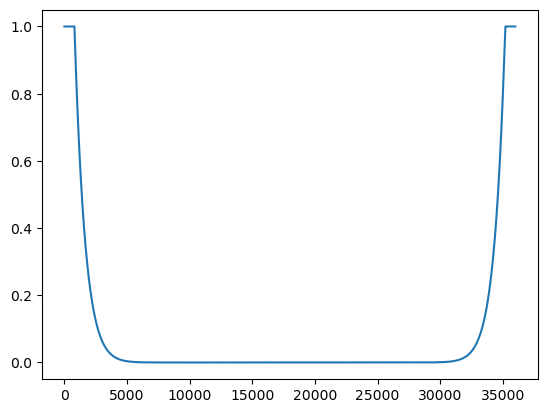

In [96]:
tfaverage = pd.read_pickle('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/TF_STA/7D.M08A/2011.293-2012.200.transfunc.pkl')
tr.correct_data(tfaverage)

# tr.fn
# tr.__dict__
# tr.frequency_notch

plt.plot(tr.comp_tf_taper)

In [93]:
# tr = read(corrected_event_file)
# tr.__dict__
display(pkl_corrected_event_file)
tr = pd.read_pickle(pkl_corrected_event_file)
# tr.frequency_notch

PosixPath('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/EVENTS/7D.M08A/CORRECTED/7D.M08A.2012.181.21.07.sta.pkl')

In [ ]:
avg = 'sta'
# tf = 'ZP'
for tf in ['ZP-H','ZP-21','Z1','Z2-1','ZP']:
    if tf=='ZP-H':
        avg = 'day'
    else:
        avg = 'sta'
    corrected_event_path = eventpath / 'CORRECTED'
    sacfile = Station.StaName + '.' + str(tstart.year) + '.' + str(tstart.julday) + '.' + str(tstart.hour) + '.' + str(tstart.minute).zfill(2) + '.' + avg + '.' + tf + '.BHZ.SAC'
    pklfile = Station.StaName + '.' + str(tstart.year) + '.' + str(tstart.julday) + '.' + str(tstart.hour) + '.' + str(tstart.minute).zfill(2) + '.' + avg + '.pkl'
    sac_corrected_event_file = corrected_event_path / sacfile
    pkl_corrected_event_file = corrected_event_path / pklfile
    print(corrected_event_file)

    tr = read(corrected_event_file)[0]

    fig = plt.figure(figsize=(20,4))
    plt.plot(tr.data)
    plt.title(tf,fontweight='bold')
    fig.suptitle(sacfile)
    plt.xlabel('samples')
    # plt.xlim(0,5000)

## To see the actual correction applied to the pre-filt event data, see lines 1993-2067 of ATaCR's EventStream class.

### --I've copied that section of the event correction code below so you can see it.

## Let's confirm this taper another way by downloading the exact same trace again from IRIS and applying the pre-processing ourselves.

#### --Download data

In [ ]:
client = Client()
net = '7D'
sta = 'M08A'
channel = 'BH1,BH2,BHZ'
start = UTCDateTime('2012-06-29T21:07:32.950000Z')
end = UTCDateTime('2012-06-29T23:07:32.750000Z')

#iris is forcing a 10 sample buffer on my requested times
start = trEZ[0].stats.starttime - 5/50
end = trEZ[0].stats.endtime + 5/50
downloaded_tr = client.get_waveforms(network=net, station=sta, location = '*',channel=channel,starttime=start, endtime=end, attach_response=True)

### --Perform proecessing which includes, in order:
## 1. De-mean
## 2. Detrend
## 3. Anti-alias filter
## 4. Decimate to new samplerate
## 5. Remove instrument response which includes:
###   -Four corner bandpass at [0.001, 0.005, 45., 50.] done with the deconvolution
####   -De-mean
####   -5% Hanning Taper
####   -Deconvolution of instrument response


In [ ]:
tr_copy = downloaded_tr.select(component='Z')[0].copy()
pre_filt = [0.001, 0.005, 45., 50.]
new_sampling_rate = 5


# Detrend, filter
tr_test_preproc = tr_copy.copy()
tr_test_preproc.detrend('demean')
tr_test_preproc.detrend('linear')
tr_test_preproc.filter('lowpass', freq=0.5*new_sampling_rate,corners=2, zerophase=True) #anti-alias filter
tr_test_preproc.resample(new_sampling_rate)

# Remove IR
tr_test_response_removal = tr_test_preproc.copy()
tr_test_response_removal.remove_response(pre_filt=pre_filt,output='DISP')

tr_test_NO_response_removal = tr_test_preproc.copy()
tr_test_NO_response_removal.remove_response(pre_filt=pre_filt,output='DISP',taper=False,zero_mean=True)

fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(tr_test_NO_response_removal.data,label='Response removed WITHOUT taper',c='r')
ax[0].plot(tr_test_response_removal.data,label='Response removed WITH taper',c='b')
taper_line = len(tr_test_response_removal.data)*0.05
ax[0].axvline(taper_line,c='r',ls=':')
ax[0].set_xlabel('Samples')
ax[0].set_xlim(0,len(tr_test_response_removal))
ax[0].legend()

ax[1].plot(tr_test_NO_response_removal.data,label='Response removed WITHOUT taper',c='r')
ax[1].plot(tr_test_response_removal.data,label='Response removed WITH taper',c='b')
taper_line = len(tr_test_response_removal.data)*0.05
ax[1].axvline(taper_line,c='r',ls=':')
ax[1].set_xlabel('Zoomed in')
ax[1].set_xlim(0,10000)
ax[1].legend()

## So the event was tapered/pre-proc correctly. Was the noise?

In [ ]:
NoiseFile = '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/Data/7D.M08A/2012.181..BHZ.SAC'

print(NoiseFile)

tr = read(NoiseFile)[0]

fig = plt.figure(figsize=(20,4))
plt.plot(tr.data)
fig.suptitle(NoiseFile)
plt.xlabel('samples')

## The noise SAC files look tapered by ATaCR. I don't trust it though because I know ATaCR holds the noise in multiple formats, specfically day and sta averaged spectra.

## Let's start by looking at the spectra for a day used in the corrected event (above).

In [ ]:
def calc_tf_taper(f,fn,exp=20):
    taper = (np.abs(f) - fn)
    taper = -taper + np.max(taper)
    taper = taper**exp
    taper[np.abs(f)<=fn] = 0
    taper[np.abs(f)<=fn] = np.max(taper)
    taper = taper/taper.max()
    return taper
def fnotch(d):
        '''The frequency knotch root function described in Crawford et al., 1998.
        depth (d) is in meters. Returned (f) is in Hz.'''
        g = 9.80665
        f = (g/(2*np.pi*d))**0.5
        return f

In [ ]:
fn = fnotch(Station.Water_Depth_m)

taper = calc_tf_taper(f,fn)

plt.figure(figsize=(20,4))
plt.axvline(fn,c='k',ls=':')
plt.axvline(-fn,c='k',ls=':')
plt.plot(f[np.argsort(f)],taper[np.argsort(f)])

In [ ]:
from obspy.signal.invsim import cosine_taper

f = tfs.f
fcut = np.array(np.array(f>=fn) & np.array(f>=0)) + np.array(np.array(f<=-fn) & np.array(f<0))
fkeep = np.where(~fcut)[0]
fcut = np.where(fcut)[0]
# len(np.where(fi))

In [ ]:
DayNoise_SpectraFile = Path('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/SPECTRA/7D.M08A/2012.181.spectra.pkl')

S = pd.read_pickle(DayNoise_SpectraFile)
fig,ax = plt.subplots(1,1,figsize=(20,9),sharex='all')
ax = [ax]
x = S.f

[ax[0].plot(x,y/y.max()) for y in S.ftZ]

ax[0].set_xlabel('Hz',fontweight='bold')
fig.suptitle('/'.join(str(DayNoise_SpectraFile).split('/')[-4:]),y=0.91)


fn = fnotch(Station.Water_Depth_m)

taper = calc_tf_taper(f,fn,exp=100)

# plt.figure(figsize=(20,4))
ax[0].axvline(fn,c='k',ls=':')
ax[0].axvline(-fn,c='k',ls=':')
ax[0].plot(f[np.argsort(f)],taper[np.argsort(f)])
ax[0].set_xscale('log')

In [ ]:
y[0:-10].max()

In [ ]:
tfs = pd.read_pickle('/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/TF_STA/7D.M08A/2011.293-2012.200.transfunc.pkl')

keys = list(tfs.transfunc['ZP-21'].keys())
fig,ax = plt.subplots(len(keys),1,figsize=(14,12),sharex='all')
for ki,key in enumerate(keys):
    x = tfs.f
    taper = calc_tf_taper(f,fn,exp=100)
    y = tfs.transfunc['ZP-21'][key]
    y_pre = tfs.transfunc['ZP-21'][key]
    y_pre = y_pre/np.abs(y_pre)[100:-100].max()
    y = y/np.abs(y)[100:-100].max()
    y_pre = y_pre[x>0]
    y = y*taper
    y = y[x>0]
    x = x[x>0]
    ax[ki].plot(x,y_pre,label=key + ' (before)',c='k')
    ax[ki].plot(x,y,label=key + ' (after)',c='r')
    ax[ki].axvline(fn,label='Fq Notch',ls='-.',c='k',alpha = 0.4)
    ax[ki].set_xlim(x[1],2.65)
    ax[ki].set_xscale('log')
    ax[ki].plot(f[np.argsort(f)],taper[np.argsort(f)],label='Taper')
    ax[ki].legend(fontsize=9,loc='upper left')
    if ki==0:
        ax[ki].set_title('All Functions Normalized',fontweight='bold')
fig.suptitle('Transfer Functions used in ZP-21 corrections (Station Averaged)',fontweight='bold',fontsize=15,y=0.93)
ax[-1].set_xlabel('Hz (log scale)',fontweight='bold',fontsize=15)

In [ ]:
sta_avg_StaNoise = '/Users/charlesh/Documents/Codes/OBS_Methods/NOISE/METHODS/ATaCR/ATaCR_Python/AVG_STA/7D.M08A/2011.293-2012.200.avg_sta.pkl'
stnoise = pd.read_pickle(sta_avg_StaNoise)
TFN = TFNoise(stnoise)
TFN.transfer_func()

x = TFN.f
c = ['c1Z','c2Z','c1P','c2P','cZP','c11','c12','c22','cPP']
fig,ax = plt.subplots(len(c),1,figsize=(25,12),sharex='all')
for ki,key in enumerate(c):
    y = np.real(TFN.__dict__[key])
    ax[ki].plot(x[x>0],y[x>0],label=key)
    ax[ki].legend(fontsize=15,loc='upper left')
    # ax[ki].set_xlim(right=x[x>=0][-1])
    ax[ki].set_xscale('log')
ax[ki].set_xlabel('Hz (log scale)',fontweight='bold',fontsize=15)
fig.suptitle('Station Avg Cross-Spectral Densities',fontweight='bold',y=0.9)

In [ ]:
# elif key == 'ZP-21':
#     if value:
#         lc1cZ = np.conj(self.c1Z)/self.c11
#         lc1c2 = np.conj(self.c12)/self.c11
#         lc1cP = np.conj(self.c1P)/self.c11

#         coh_12 = utils.coherence(self.c12, self.c11, self.c22)
#         coh_1P = utils.coherence(self.c1P, self.c11, self.cPP)

#         gc2c2_c1 = self.c22*(1. - coh_12)
#         gcPcP_c1 = self.cPP*(1. - coh_1P)

#         gc2cZ_c1 = np.conj(self.c2Z) - np.conj(lc1c2*self.c1Z)
#         gcPcZ_c1 = self.cZP - np.conj(lc1cP*self.c1Z)

#         gc2cP_c1 = np.conj(self.c2P) - np.conj(lc1c2*self.c1P)

#         lc2cP_c1 = gc2cP_c1/gc2c2_c1
#         lc2cZ_c1 = gc2cZ_c1/gc2c2_c1

#         coh_c2cP_c1 = utils.coherence(gc2cP_c1, gc2c2_c1,gcPcP_c1)

#         gcPcP_c1c2 = gcPcP_c1*(1. - coh_c2cP_c1)
#         gcPcZ_c1c2 = gcPcZ_c1 - np.conj(lc2cP_c1)*gc2cZ_c1

#         lcPcZ_c2c1 = gcPcZ_c1c2/gcPcP_c1c2

#         tf_ZP_21 = {'TF_Z1': lc1cZ, 'TF_21': lc1c2,
#                     'TF_P1': lc1cP, 'TF_P2-1': lc2cP_c1,
#                     'TF_Z2-1': lc2cZ_c1, 'TF_ZP-21': lcPcZ_c2c1}
#         transfunc.add('ZP-21', tf_ZP_21)